# Welcome to lab_regression! 🏠

One of the coolest parts of Data Science is **prediction** with **machine learning**. Up to now, we have done a myriad of data analysis given existing data points. We have even generated our own data in simulations! Today, using some foundational concepts of machine learning, we will be making predictions based on data!

As you learned in lecture, **linear regression** is a powerful tool that can be used to quantify trends noticed in existing datasets. We can use our skills in Python to perform **simple linear regression** in this lab! 


A few tips to remember:

- **You are not alone on your journey in learning programming!** You have your lab Teaching Assistant, your Course Aides, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help! When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same ***ah-hah*** moment!
- We are here to help you! Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [ ]:
# Meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = ""
ca1_name = ""
ca2_name = ""


# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# Question of the Day (QOTD) to Ask Your Group: "Are you living in an apartment next year?"
partner1_name = ""
partner1_netid = ""
partner1_apartment = ""

partner2_name = ""
partner2_netid = ""
partner2_apartment = ""

partner3_name = ""
partner3_netid = ""
partner3_apartment = ""

<hr style="color: #DD3403;">

# Part 1: Housing Data EDA

Today, we'll be working with a **housing prices** dataset. This data has the price of many houses/properties alongside various descriptive qualities of those properties (the total square feet, number of bathrooms, number of bedrooms, etc.).

We will employ basic **machine learning** techniques in this lab by trying to **predict house prices** with a **linear regression** model.

But before we approach this implementation of **simple linear regression**, let's **familiarize ourself with the data** by doing some **EDA**. This will include:
- Viewing a correlation matrix of our data
- Plotting visualizations to see relationships in the data

## Puzzle 1.1: Loading In
We've provided you with a `housing.csv` file containing the Housing Dataset. You know the drill. Let's **import the Housing Dataset** in the cell below. Make sure you name your DataFrame `df`. 

In [3]:
import pandas as pd

df = pd.read_csv('housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### 🔬 Test Case Checkpoint 🔬

In [2]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert ( 'df' in vars() ), "Your DataFrame should be named df."
assert( len(df) == 545 ), "This is not the Housing Dataset we are looking for..."
assert( 'price' in df.columns.to_list() ), "This is not the Housing Dataset we are looking for..." 

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.2: Correlation Matrix
In lecture, you learned about the correlation coefficient $r$ which measures the **strength of linear association** between two variables ($X$ and $y$).

Pandas provides a useful function `.corr()` that generates a table of the correlation coefficients between all columns in a DataFrame.

Now, find the correlation coefficient matrix for `df`:

In [4]:
correlation_matrix = df.corr()
print(correlation_matrix)


              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


/var/folders/4f/9bgxlw4d3t73l9c7k6msj9fh0000gn/T/ipykernel_2189/1752422992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


### ML Vocabulary: Features and Labels

Quick vocabulary lesson! In machine learning, we often organize **instances** in our dataset into **features** and **labels** (in this lab, an **instance** is one row of our DataFrame). 

**Features** are characteristics that describe each **instance** in our dataset . These **features** are the **inputs** fed to machine learning models that will make **predictions**. They are our **independent variables**, or $X$. 

**Labels** are the output or **target** variables we are **trying to predict**. They are our **dependent variables**, or $y$. 

In the context of our housing dataset, the single **label** we are trying to predict is the **price** of a housing property. 

### Analysis: Potential Features

**Q1: Given that our label (what we want to predict) is price, what are some *meaningful features* we could use to train a model? Use numbers from the correlation matrix to support your answer**

ou should look for the variables that have relatively high absolute correlation values with the 'price' column. These variables can be considered as potential features for training a model. For example, area and price have a high coefficient of 0.536, indicating a moderate positive linear relationship. A larger area generally corresponds to a higher price.

## Puzzle 1.3: Visualizations
For the purposes of this lab, we are ultimately interested in how we can best predict **price** ($y$) with a **single feature** ($X$) from our `df`. 

But first, let's observe the relationships between various other colums in `df`. 

### Scatter Plot #1: Bedrooms and Bathrooms
Generate a scatterpot from `df` where the dependent variable ($y$) is `bedrooms` and independent variable ($X$) is `bathrooms`.

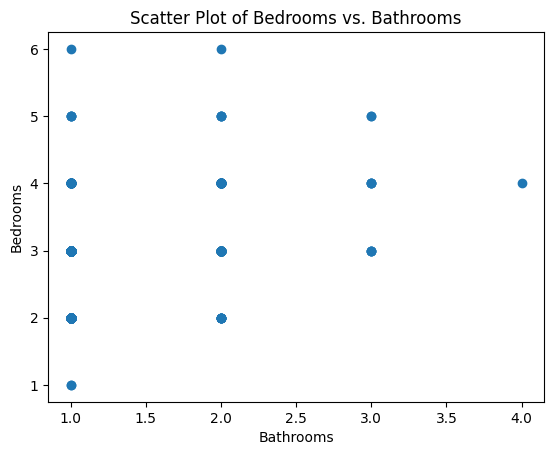

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['bathrooms'], df['bedrooms'])
plt.xlabel('Bathrooms')
plt.ylabel('Bedrooms')
plt.title('Scatter Plot of Bedrooms vs. Bathrooms')
plt.show()


**Group Discussion 1**: Do you see any *trends* in the scatter plot between **bedrooms** and **bathrooms**? If your group were to describe the *correlation*, how would you all describe it? 
Is the relation positive or negative? Does it seem linear or non-linear? Is there a strong or weak *relationship* between the variables?

There is a weak positive linear relationship, there is a weak relationship between the variables.

**Q2: Looking back to the correlation coefficient in Puzzle 1.3, what was the correlation coefficient for this pair of data points? Does it align with your discussion above? Does it make sense logically?**

It aligns with the discussion above. The correlation coeffiecient was 0.3739 which indicates a positive linear weak relationship. This makes sense logically as there would be more bathrooms as the bedroom number goes up to accomodate for a larger number of residents.

### Scatter Plot #2: Stories and Parking
Generate a scatterpot from `df` where the dependent variable ($y$) is `stories` and independent variable ($X$) is `parking`.

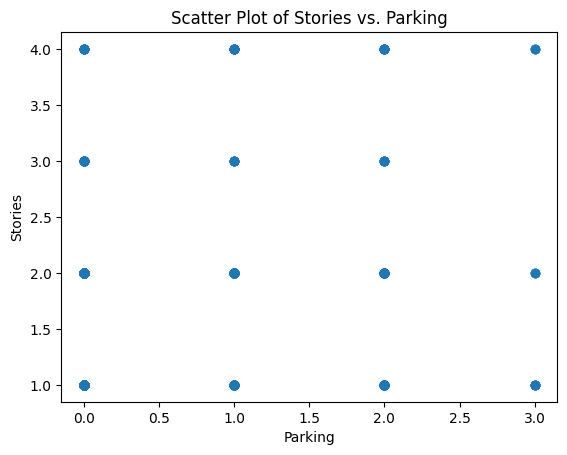

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['parking'], df['stories'])
plt.xlabel('Parking')
plt.ylabel('Stories')
plt.title('Scatter Plot of Stories vs. Parking')
plt.show()


**Group Discussion 2**: Do you see any *trends* in the scatter plot between **parking** and **stories**? If your group were to describe the *correlation*, how would you all describe it? 
Is the relation positive or negative? Does it seem linear or non-linear? Is there a strong or weak *relationship* between the variables?

It looks as if there is no relationship, I do not see any general linearity and there is no sign of whether the direction is positive or negative. Everything looks almost uniform so it is extremely weak, if anything.

**Q3: Looking back to the correlation coefficient in Puzzle 1.3, what was the correlation coefficient for this pair of data points? Does it align with your discussion above? Does it make sense logically?**

This makes sense with the correlation coefficient from puzzle 1.3. The coefficient was 0.0455. This is very close to zero and so it aligns with the observations made from the scatter plot. Logically, I would think that with more stories, there would be more occupants/residents, and therefore more parkign to accomodate them.  

### Scatter Plot #3: Area and Price
Now, let's circle back to our original goal of predicting **price**. 

Generate a scatterpot from `df` where the dependent variable ($y$) is `price` and independent variable ($X$) is `area`.



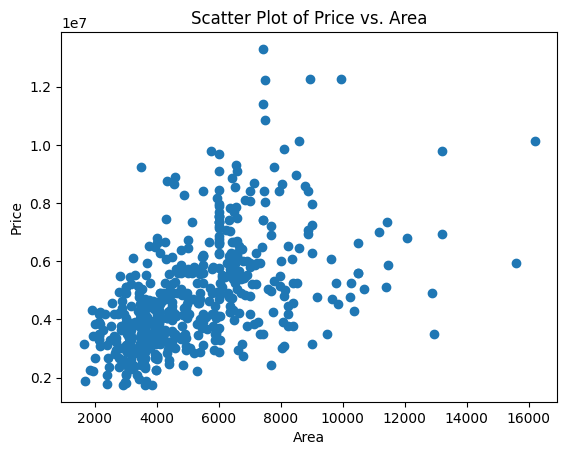

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Area')
plt.show()


**Group Discussion 3**: Do you see any *trends* in the scatter plot between **area** and **price**? If your group were to describe the *correlation*, how would you all describe it? 
Is the relation positive or negative? Does it seem linear or non-linear? Is there a strong or weak *relationship* between the variables?

I see a very great and strong linear relationship in a positive direction. The points form a clear trend and are all pretty clustered together.

**Q3: Looking back to the correlation coefficient in Puzzle 1.3, what was the correlation coefficient for this pair of data points? Does it align with your discussion above? Does it make sense logically?**

I think the correlation coefficient does align with the observations from the scatterplot. The coefficient was 0.5 which is pretty strong and enough to see a clear positive trend like I did. Also, logically, it does make sense because the greater the size of the property, it makes sense it would cost more.

<hr style="color: #DD3403;">

# Part 2: Simple Linear Regression

From Scatter Plot #3 above, you may have noticed that **area** and **price** have significant **linear correlation**. 

In lecture, we learned that **linear regression** allows us to predict values based on a "line of best fit". The equation for simple linear regression is:

> $$y = (\text{slope}) * X + \text{intercept}$$

For this portion of the lab, we will be using **linear regression** to explore the relationship between **area** (in square feet) and **price** (in dollars) of housing properties in our `df`. 

We can apply formulas we've learned in lecture alongside Python to create a **linear regression model** to predict **housing price** ($y$) given **area** ($X$).

## Puzzle 2.1: Calculating Slope of the Regression Line
In lecture, you learned how to **calculate the slope** of the regression line given your $X$ and $y$ columns of data. The formula is as follows:

> $$\text{slope} = r * \frac{SD(y)}{SD(x)}$$

Where $r$ is the correlation coefficient between $X$ and $y$, and $SD$ stands for standard deviation. 

With this, find the slope of the regression line where the dependent variable ($y$) is `price` and the independent variable ($X$) is `area`, storing your answer in the **numeric variable** `slope` below:

In [9]:
r = df['area'].corr(df['price'])

sd_X = df['area'].std()
sd_y = df['price'].std()

slope = r * (sd_y / sd_X)

slope


461.9748942727835

**Q4: How do you interpret your slope?  What does it mean in terms of the actual units in this probelm: `area` (square feet) and `price` (dollars)?**

The slope indicates that for every increase of 1 square foot of area on the property, the price, on average, increases $461.97.

## Puzzle 2.2: Calculating Intercept of the Regression Line
You also learned how to calculate the **y-intercept** of the regression line in lecture. The formula is as follows:

> $$\text{intercept} = \text{avg}(y) - \text{slope} * \text{avg}(X)$$

Find the **y-intercept** of the regression line between `price` ($y$) and `area` ($X$), storing your result in the numeric variable `intercept` below: 

In [10]:
avg_X = df['area'].mean()
avg_y = df['price'].mean()

intercept = avg_y - slope * avg_X

intercept


2387308.48239643

**Q5: How do you interpret your intercept?  What does it mean in terms of the actual units in this problem: `area` (square feet) and `area` (dollars)?  Does it even make sense in the context of this problem?**

The y-intercept represents the predicted price of a house when its area is equal to 0 square feet. It does not make much sense logically to have a 0 square foot house, but it does provide information for a starting point.

### 🔬 Test Case Checkpoint 🔬

In [11]:
## == TEST CASES for Puzzle 2.1, 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
from math import isclose
assert( isclose(slope, 461.9748942727831) ), "The slope doesn't seem correct"
assert( isclose(intercept, 2387308.4823964317) ), "The intercept doesn't seem correct"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Visualizing Your Work: Seaborn 
Now that you've calculated the **slope** and **y-intercept** of your regression line, let's **visualize** it. Run the following code that uses the `seaborn` library to **plot a regression line** on top of a scatterplot of bewteen `area` and `price` - your regression line will be **red**. 

<Axes: xlabel='area', ylabel='price'>

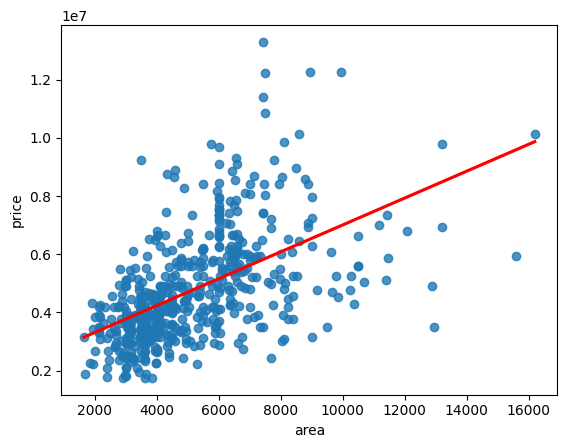

In [12]:
# Run the following code to see the regression line you made!!! :)
import seaborn as sns

# Create scatterplot with regression line:
sns.regplot(data=df, x="area", y="price", ci=None, line_kws={'color':'red'})

### Analysis: Regression Plot
**Q6: Based on the regression line plotted above, would you say it is a good model of predicting the housing price? For what range of `area` would you be confident predicting price given this model?**

This seems like a good model of predicting the housing price. The correlation is strong and the line seems to accurate follow the trend. I would feel most comfortable in the range of 2,000 to 8,000 as the points are most clustered and the relationship is the strongesst there.

<hr style="color: #DD3403;">

# Part 3: Predictions and Residuals

## Puzzle 3.1: Predicting Price

In Part 2, you found the intercept and slope for a line of best fit. Using your regression line, make a new column in our DataFrame `df` named `price_prediction`, which will store the **predicted price** for each house given it's `area`. Use the values you calculated above in an equation of the regression line to populate this column. Remember,

> $$y = (\text{slope}) * X + \text{intercept}$$

In [13]:
df['price_prediction'] = slope * df['area'] + intercept

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_prediction
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,5.815162e+06
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,6.526604e+06
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,6.988578e+06
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,5.852120e+06
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5.815162e+06


### 🔬 Test Case Checkpoint 🔬

In [14]:
## == TEST CASES for Puzzle 3.1  ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
from math import isclose
assert( 'price_prediction' in df.columns.to_list() ), "Your DataFrame df does not contain a new column `price_prediction`."
assert( isclose(df.price_prediction.mean(), 4766729.247706421) ), "You have not calculated the predictions of price correctly. Double-check your formula."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.2: Calculating Residuals
Residuals are the **differences between** the **observed (actual) value** of $y$ (`price`) and the **predicted value** of $y$ (`price_prediction`, or just $\hat{y}$).

Let's **find the residuals** and **evaluate** your simple regression model! 

In the following cell, write the Python code to store the **residual** for the `price` column as `residual`.

In [15]:
df['residual'] = df['price'] - df['price_prediction']

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_prediction,residual
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,5.815162e+06,7.484838e+06
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,6.526604e+06,5.723396e+06
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,6.988578e+06,5.261422e+06
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,5.852120e+06,6.362880e+06
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,5.815162e+06,5.594838e+06


### 🔬 Test Case Checkpoint 🔬

In [16]:
## == TEST CASES for Puzzle 3.2  ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
assert(round(df["residual"].sum(), 0) == 0), "The residuals might not be correct. Please check again!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 3.3: Root Mean Squared Error

One way to evaluate our model is to find the **RMSE**, or **root mean squared error**. You've learned how to find this in lecture. 

If you don't remember: the RMSE is the **square root** of the **mean** of the **residuals squared**. 

- **Key Observation**: We cannot just use `df.residual.mean()`.  Linear regression finds the "line of best fit" that will ensure half of the error is above the line and half of it is below -- so a simple `mean` will be `0`. Thus, we need the **square** of **RMSE** 

In the following cell, calculate the RMSE of our predictions, storing the result in the **numeric variable** `rmse` below:

In [17]:
import numpy as np

mean_squared_residuals = np.mean(df['residual']**2)
rmse = np.sqrt(mean_squared_residuals)
rmse


1577612.5627607866

### 🔬 Test Case Checkpoint 🔬

In [18]:
## == TEST CASES for Puzzle 3.3  ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
from math import isclose
assert( isclose(rmse, 1577612.5627607866) ), "Your RMSE might not be correct. Please check again!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Analysis: RMSE
**Q7: How do you interpret your RMSE value?  What does it mean in terms of the actual units in this problem: `area` (square ft.) and `price` (dollars)?**

1,577,612.56 is the average difference between the actual housing prices and the predicted housing prices from the linear regression model. This should be in price units as it is the dependant variable.


<hr style="color: #DD3403;">

# Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)

<hr style="color: #DD3403;">

Author's Note: The dataset for this lab was found on **Kaggle**: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset. 

If you're ever curious and looking for a set of data about a hobby that you have, try searching for it on Kaggle!